In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import itertools

import pandas as pd
import upath
import extras

In [3]:
import logging

# set up handler
handler = logging.StreamHandler()
formatter = logging.Formatter("%(asctime)s %(levelname)s %(message)s")
handler.setFormatter(formatter)
logging.getLogger().handlers = [handler]

# set up logger
logger = logging.getLogger(__name__)

# set levels
logging.getLogger().setLevel("INFO")
logger.setLevel("DEBUG")
logging.getLogger("extras").setLevel("INFO")

In [4]:
path_root = upath.UPath("gs://liulab/differential_composition_and_expression/20230310_21h01m15s")
# print(extras.get_parquet_paths(path_root))
# !gsutil ls "{path_root}/*"

In [5]:
df_gene_stats = extras.load_gene_stats(path_root)

In [6]:
df_gene_stats.groupby("malignant_means	log2_fc	run_id".split("\t")).size()

malignant_means  log2_fc  run_id
0.55,0.85        -1.50    00        16063
                          01        16063
                          02        16063
                          03        16063
                          04        16063
                                    ...  
0.85,0.55        1.50     00        16063
                          01        16063
                          02        16063
                          03        16063
                          04        16063
Length: 280, dtype: int64

## ROC (TPR, FPR)

In [7]:
df_roc_curves, df_roc_auc_scores = extras.calculate_roc(df_gene_stats)

In [26]:
u = "\N{GREEK CAPITAL LETTER DELTA}"
print(u)

Δ


In [30]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)


def mean_and_stddev(series: pd.Series):
    mean = series.mean()
    stddev = series.std()
    return f"{mean:4.2f}±{stddev:4.2f}"


(
    df_roc_auc_scores.groupby(["malignant_means", "log2_fc"])
    .agg(func=mean_and_stddev)
    .unstack("log2_fc")
).style.background_gradient(cmap=cm)

log2_fc,-1.50,-1.00,-0.50,0.00,0.50,1.00,1.50
malignant_means,,,,,,,
"0.55,0.85",0.58±0.03,0.56±0.01,0.56±0.02,0.57±0.02,0.55±0.02,0.56±0.01,0.56±0.03
"0.65,0.75",0.55±0.03,0.58±0.03,0.58±0.02,0.59±0.02,0.59±0.02,0.58±0.03,0.58±0.02
"0.7,0.72",0.57±0.02,0.56±0.03,0.59±0.02,0.55±0.03,0.59±0.02,0.59±0.03,0.59±0.01
"0.71,0.71",0.58±0.03,0.59±0.03,0.61±0.03,0.58±0.01,0.59±0.03,0.59±0.03,0.59±0.04
"None,None",0.56±0.03,0.58±0.02,0.57±0.01,0.58±0.01,0.58±0.02,0.58±0.04,0.60±0.02
"0.72,0.7",0.59±0.02,0.59±0.04,0.59±0.01,0.59±0.02,0.59±0.02,0.56±0.04,0.58±0.02
"0.75,0.65",0.58±0.02,0.57±0.02,0.57±0.02,0.58±0.01,0.60±0.02,0.58±0.02,0.56±0.02
"0.85,0.55",0.57±0.03,0.56±0.01,0.56±0.02,0.55±0.01,0.57±0.02,0.56±0.02,0.57±0.03


In [9]:
fig = extras.plot_roc(df_roc_curves)

In [10]:
for row, col in itertools.product(*fig._get_subplot_rows_columns()):
    # print(row, col)
    fig.add_shape(
        type="line",
        line=dict(dash="dash"),
        x0=0,
        x1=1,
        y0=0,
        y1=1,
        row=row,
        col=col,
    )

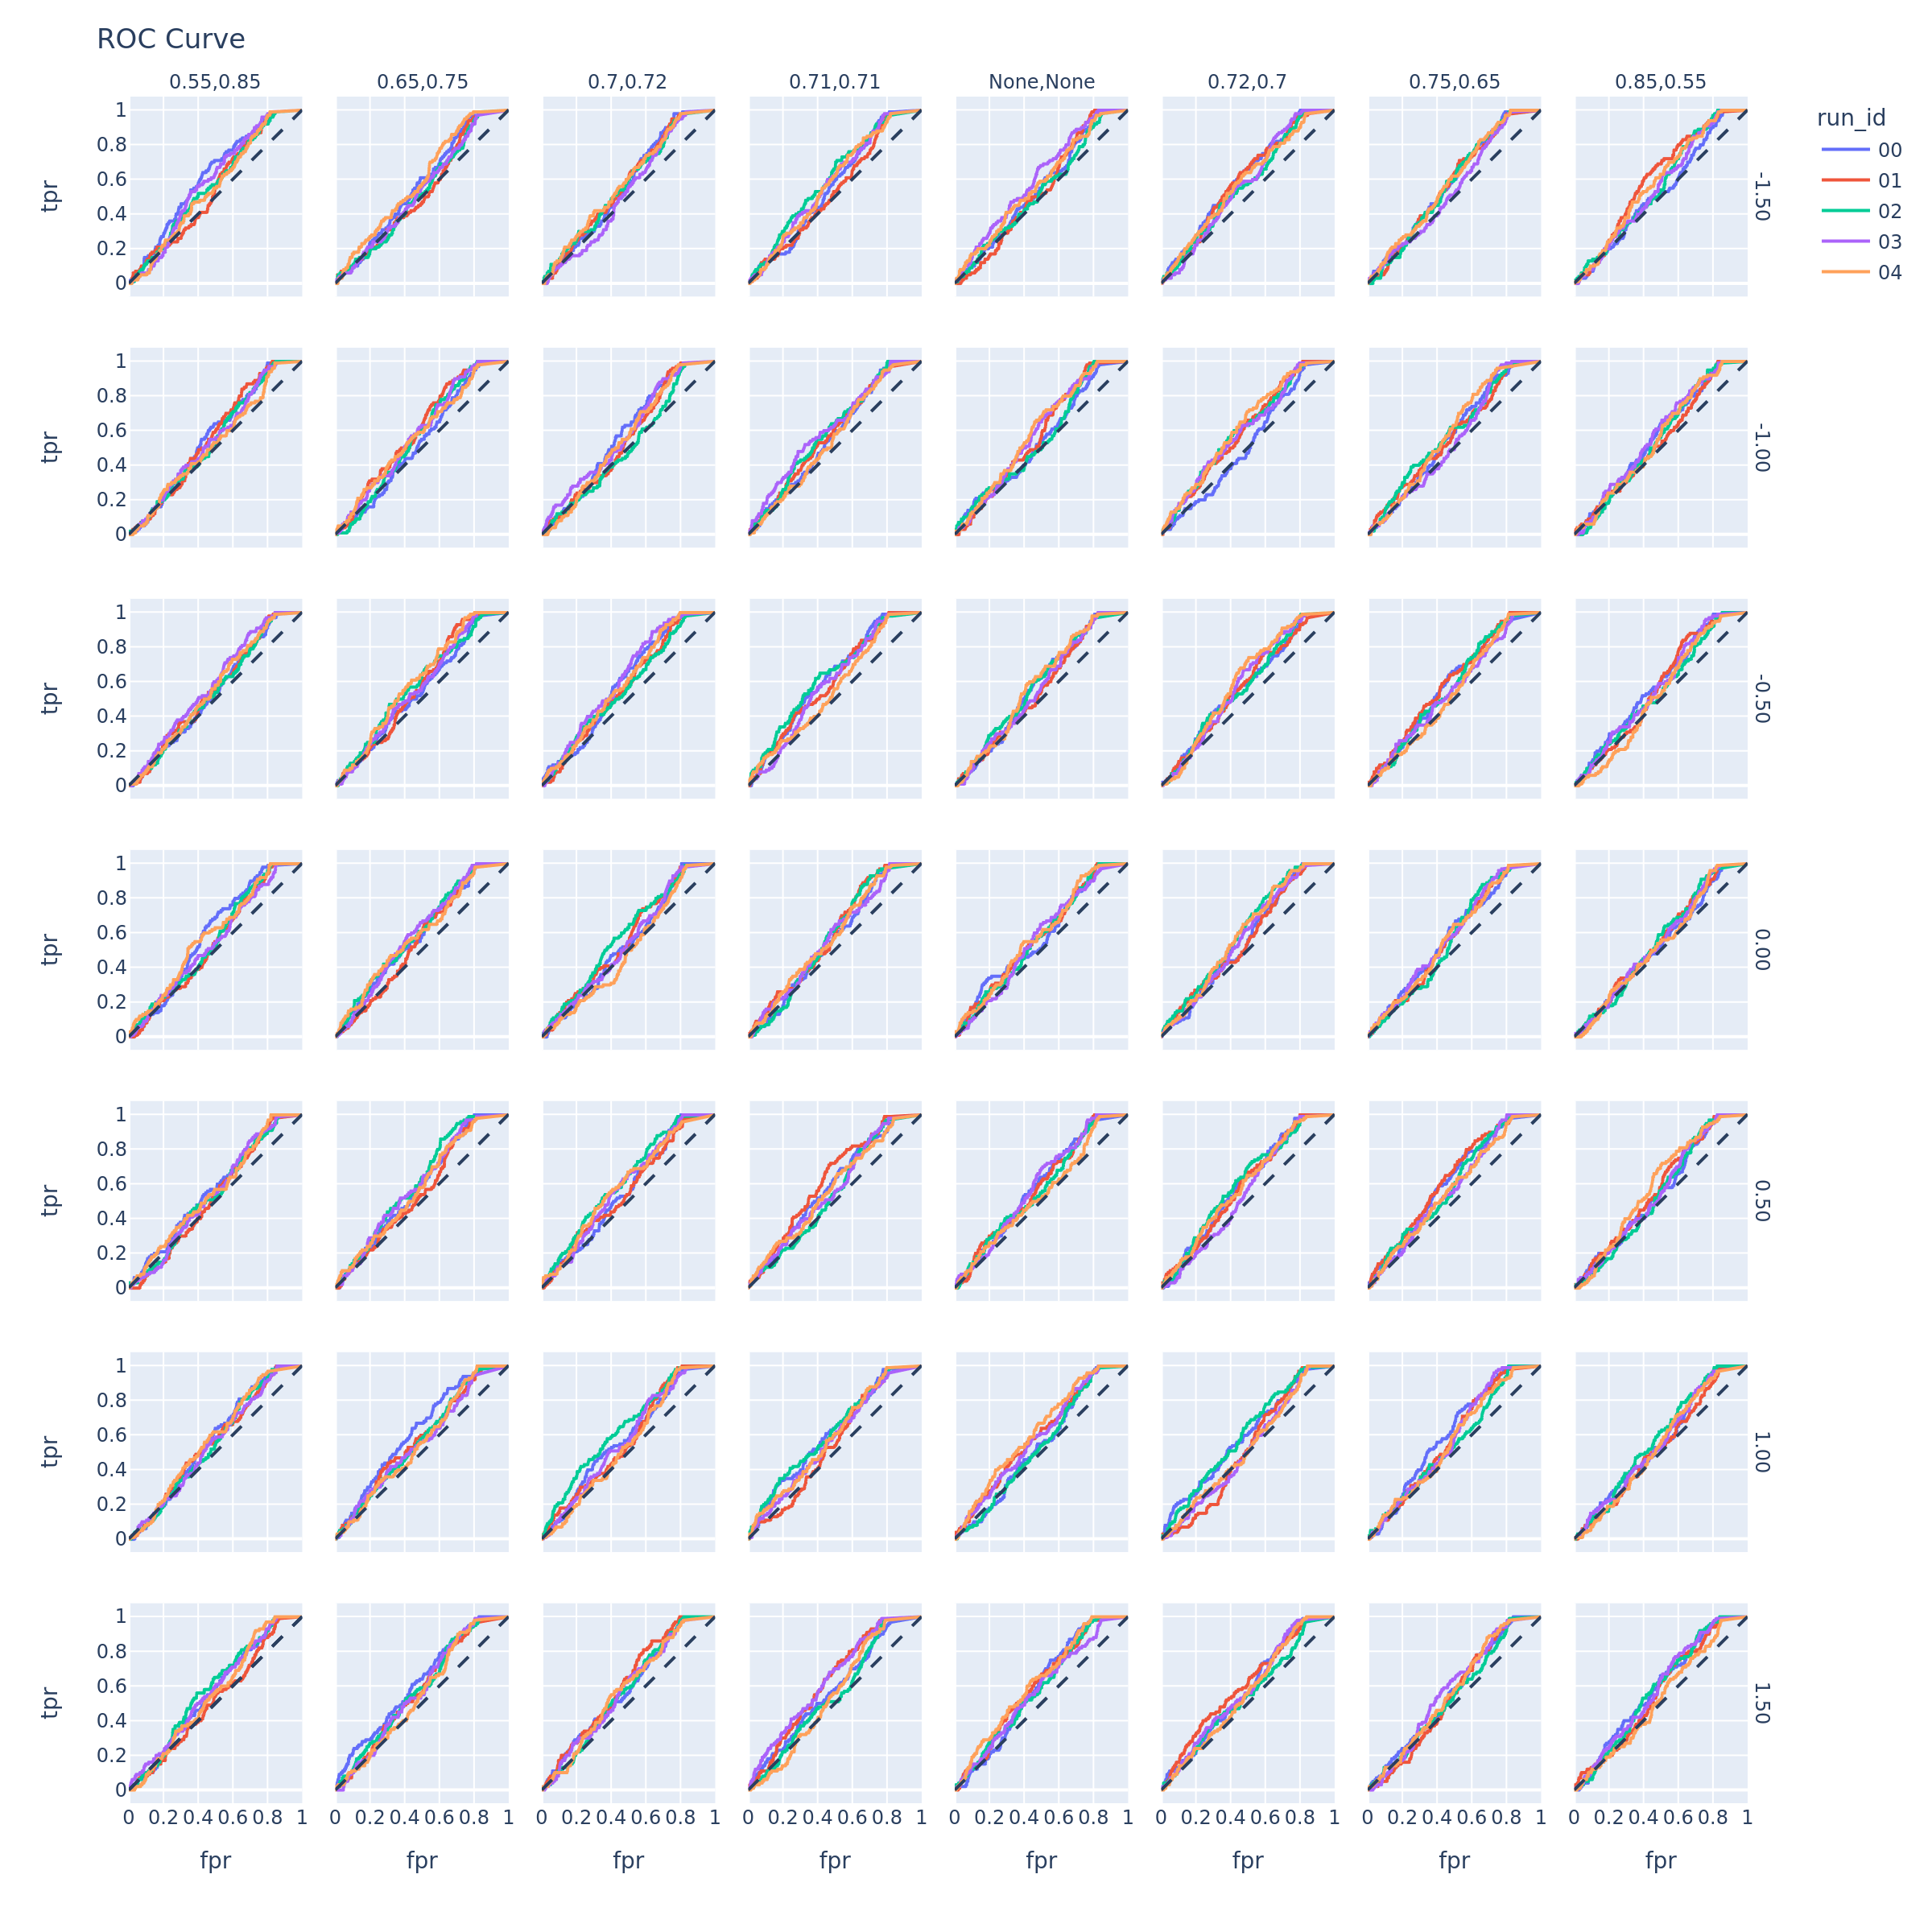

In [11]:
fig.update_layout(width=1200, height=1200)
fig.show(renderer="png", scale=2)

## precision and recall

In [12]:
df_prc = extras.calculate_precision_and_recall(df_gene_stats)
df_prc

precision  recall    thresholds
malignant_means log2_fc run_id                                      
0.55,0.85       -1.50   00     0      0.006225    1.00  6.103973e-10
                               1      0.006226    1.00  9.438371e-09
                               2      0.006226    1.00  1.325511e-08
                               3      0.006227    1.00  4.832239e-08
                               4      0.006227    1.00  5.538792e-08
...                                        ...     ...           ...
0.85,0.55       1.50    04     6123   0.000874    0.02  9.972468e-01
                               6124   0.000874    0.02  9.972497e-01
                               6125   0.000875    0.02  9.972498e-01
                               6126   0.000884    0.02  1.000000e+00
                               6127   1.000000    0.00           inf

[1555308 rows x 3 columns]

In [13]:
fig = extras.plot_precision_recall_curve(df_prc)

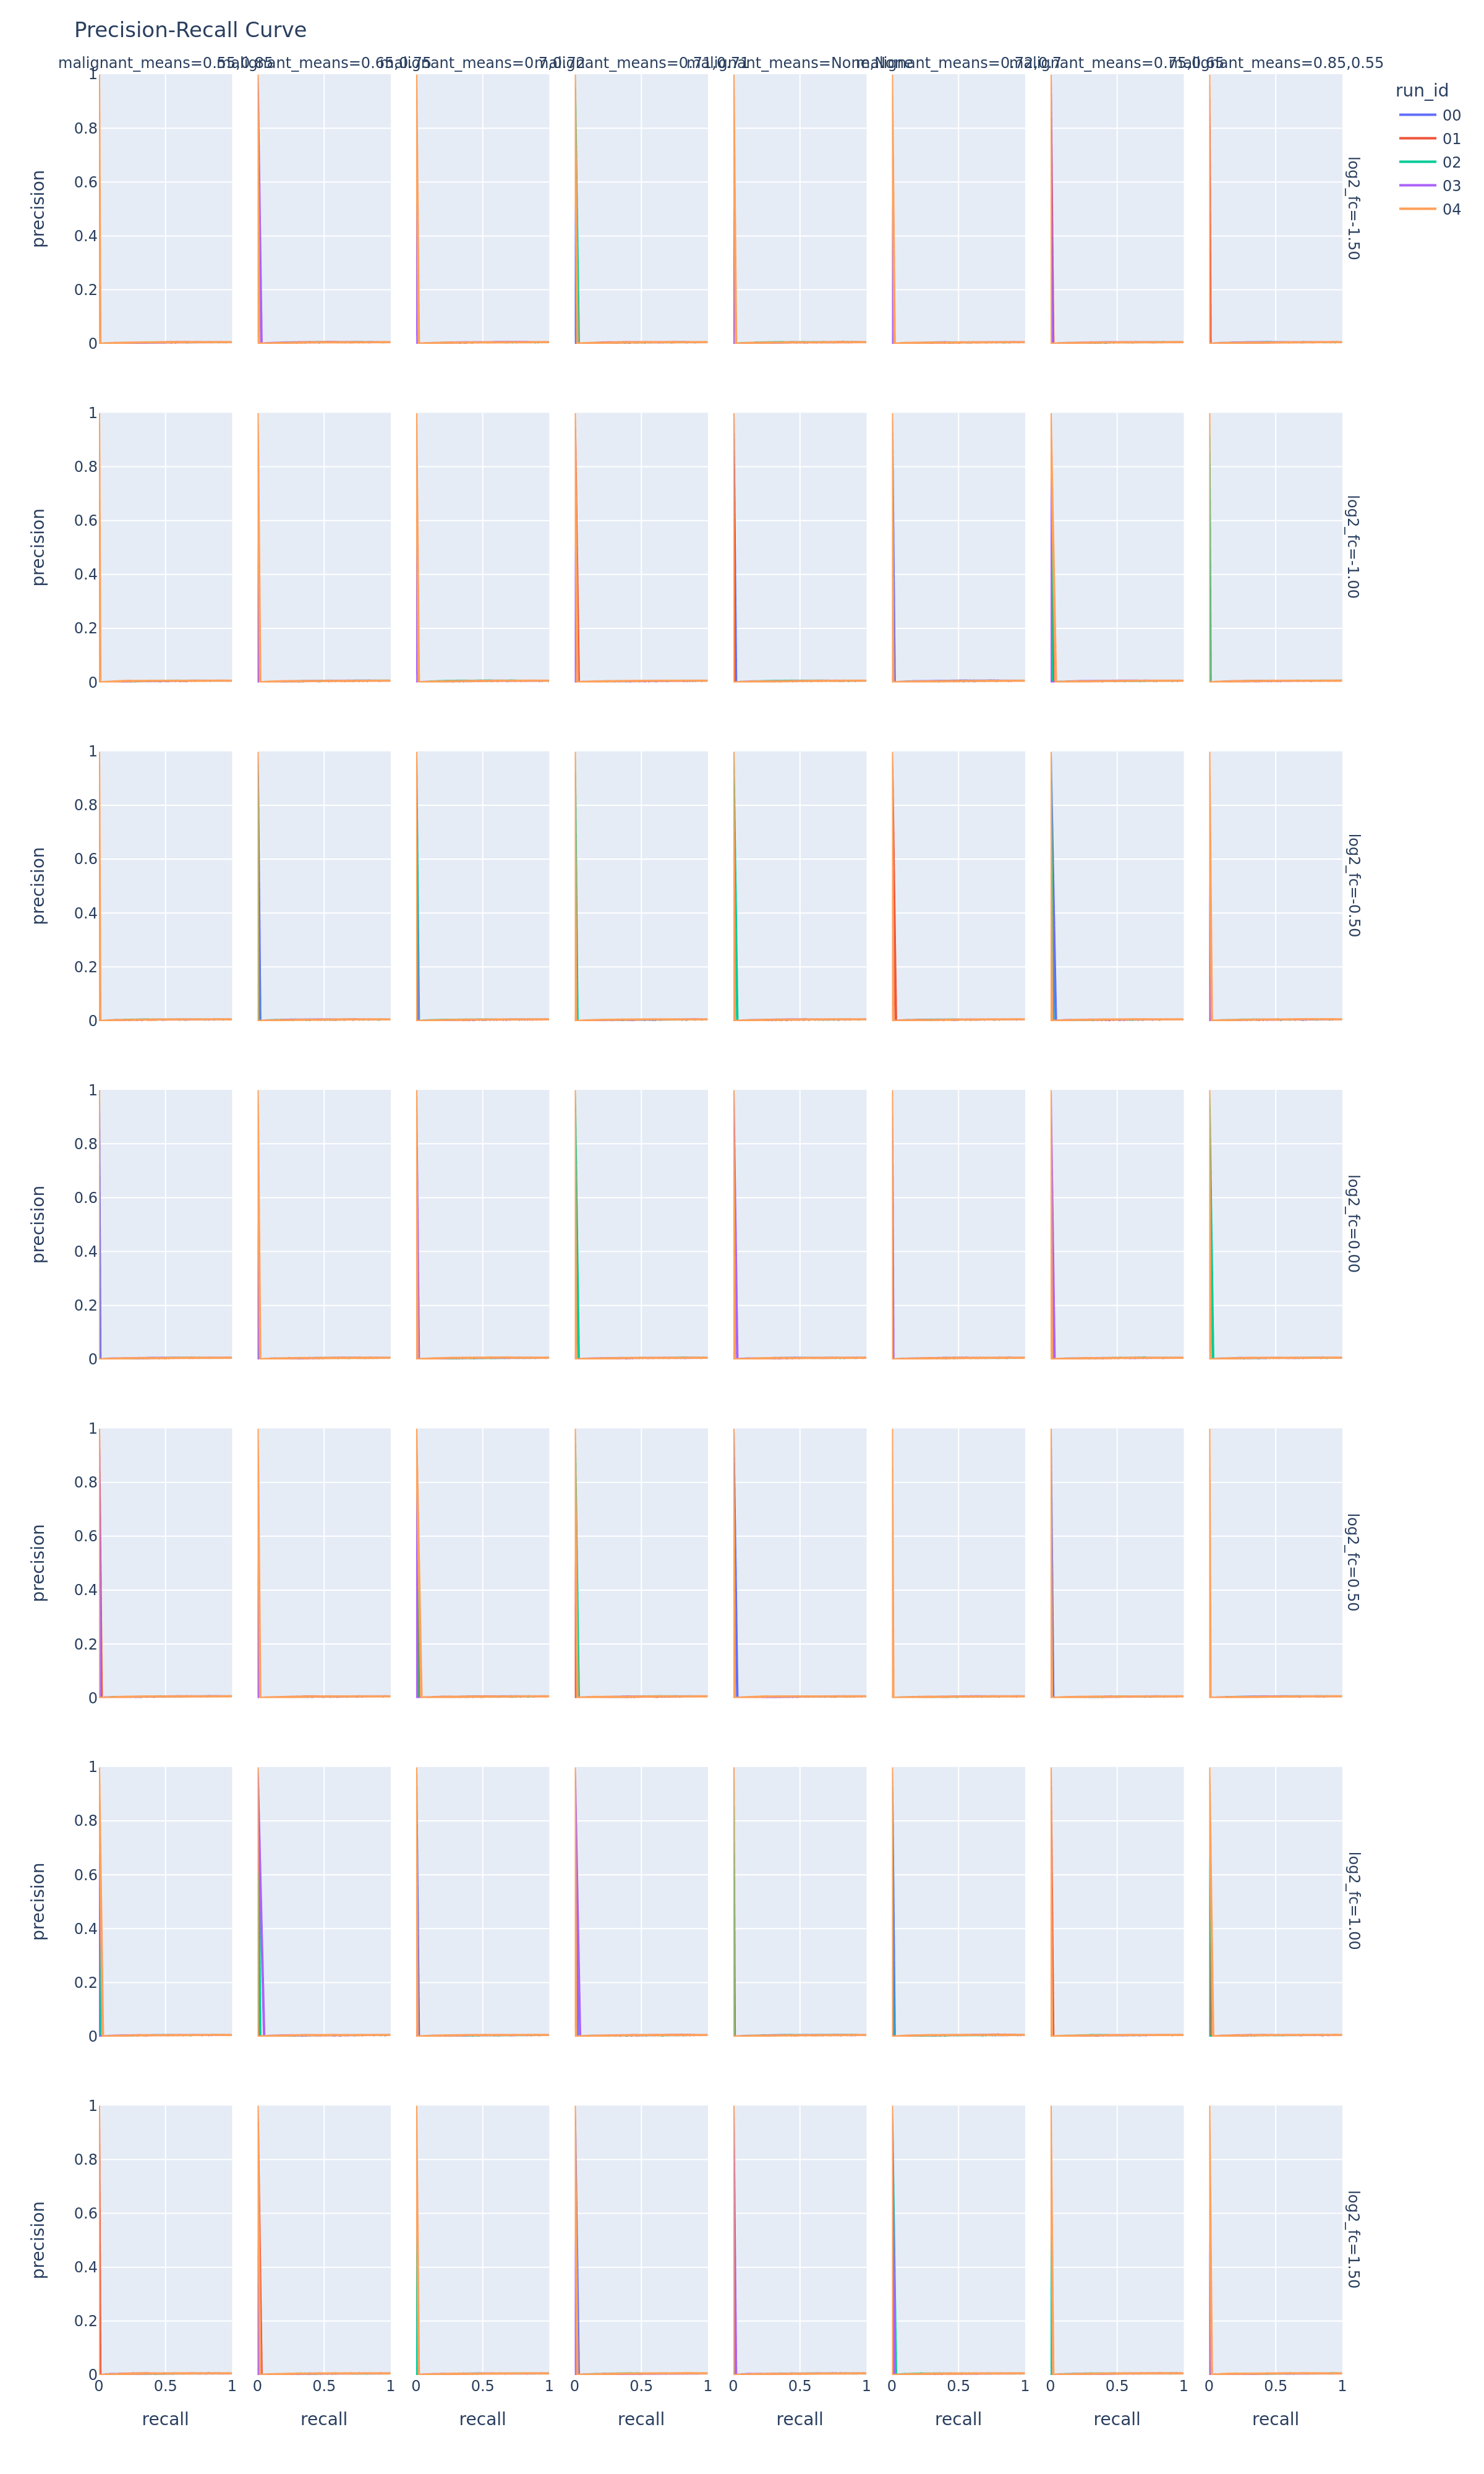

In [14]:
fig.update_layout(width=1200, height=2000)
fig.show(renderer="png", scale=2)